<a href="https://colab.research.google.com/github/bucky-ops/Jupyter-Predictions/blob/main/tensorflowpart_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10,10,(observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-10,10,(observations, 1))

generated_targets = 2 * xs -3 * zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

In [4]:
training_data = np.load('TF_intro.npz')

In [8]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])

model.compile(optimizer='sgd',loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 76.2579 - 304ms/epoch - 9ms/step
Epoch 2/100
32/32 - 0s - loss: 38.5788 - 47ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 35.7557 - 39ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 35.5338 - 46ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 34.7414 - 43ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 35.0517 - 39ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 34.9049 - 38ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 35.0085 - 46ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 34.1821 - 38ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 34.8894 - 54ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 35.1461 - 40ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 34.7906 - 42ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 34.1866 - 37ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 34.3854 - 44ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 34.8706 - 36ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 34.6279 - 37ms/e

In [9]:
model.layers[0].get_weights()

[array([[ 2.1196313],
        [-2.8721237]], dtype=float32), array([5.2551484], dtype=float32)]

In [10]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.1196313],
       [-2.8721237]], dtype=float32)

In [11]:
bias = model.layers[0].get_weights()[1]
bias

array([5.2551484], dtype=float32)

In [12]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-14.8],
       [ 30.4],
       [-16.5],
       [-21.8],
       [-31.3],
       [ 38.7],
       [ 18.6],
       [-37.4],
       [ 27.8],
       [ -0.8],
       [-32.2],
       [  4.1],
       [ -8. ],
       [ 42.3],
       [-22.9],
       [ -4.1],
       [-20.6],
       [ 35.6],
       [-19.1],
       [ 20.3],
       [ 37.9],
       [  2.6],
       [  5. ],
       [  4.6],
       [ 10.6],
       [ -5.7],
       [ 14.2],
       [-28.4],
       [-39.2],
       [-14.9],
       [ 26.3],
       [-24.2],
       [  9.3],
       [-16.3],
       [-26.2],
       [ 31.5],
       [ 27.3],
       [ 13.5],
       [ 25. ],
       [ 27.2],
       [-19.8],
       [ 10.8],
       [  8.1],
       [ 25.4],
       [ -8.1],
       [-18.3],
       [ 49.8],
       [ 42.7],
       [ 23.1],
       [  6.7],
       [ 41. ],
       [-30. ],
       [ -2. ],
       [ 21.6],
       [ 18.4],
       [ 13.6],
       [ 14.5],
       [-33.1],
       [ -7.1],
       [ 20.7],
       [  3.4],
       [ -7.1],
       [

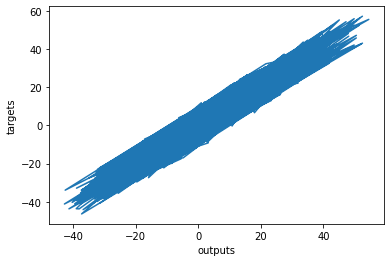

In [14]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()